In [1]:

import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv("E:\insideAIML\ML\drug200.csv")

In [47]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [48]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [49]:
x= df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [50]:
y=df['Drug'].values

In [51]:
set(df["Sex"])

{'F', 'M'}

In [52]:
set(df['BP'])

{'HIGH', 'LOW', 'NORMAL'}

In [53]:
set(df['Cholesterol'])

{'HIGH', 'NORMAL'}

In [54]:
set(y)

{'drugA', 'drugB', 'drugC', 'drugX', 'drugY'}

In [55]:
from sklearn.preprocessing import LabelEncoder 

In [56]:
le_age =LabelEncoder() 
le_age.fit(['F', 'M']) 
x[: ,1] = le_age.transform(x[: ,1])

In [57]:
le_bp =LabelEncoder() 
le_bp.fit(['HIGH', 'LOW', 'NORMAL']) 
x[ : , 2] = le_bp.transform(x[ : , 2])

In [58]:
le_chol =LabelEncoder() 
le_chol.fit(['HIGH', 'NORMAL']) 
x[ : , 3] = le_chol.transform(x[ : , 3])

In [64]:
x[ :5 , :]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [60]:
le_y =LabelEncoder() 
le_y.fit(['drugA', 'drugB', 'drugC', 'drugX', 'drugY']) 
y = le_y.transform(y)

In [65]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [66]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=50)
tree =  DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
ypred = tree.predict(xtest)
accuracy_score(ytest,ypred)

0.975

In [67]:
set(y)

{0, 1, 2, 3, 4}

In [37]:
xtest[:5]

array([[35, 1, 1, 1, 9.17],
       [38, 1, 1, 0, 18.295],
       [43, 1, 1, 0, 15.376],
       [41, 0, 2, 1, 22.905],
       [39, 1, 0, 0, 9.664]], dtype=object)

In [69]:
import matplotlib.pyplot as plt 

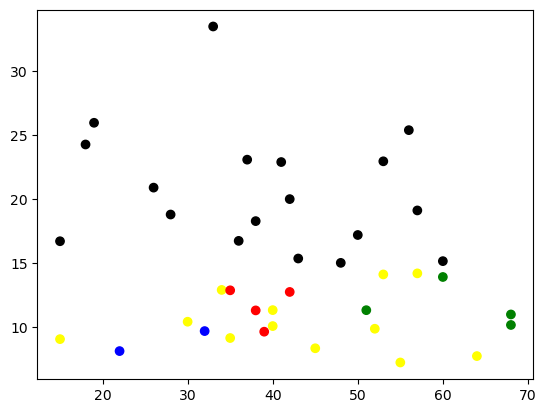

In [71]:
import numpy as np
colourset = np.array(['red','green','blue','yellow','black'])
plt.scatter(xtest[:,0],xtest[:,-1],c=colourset[ytest])

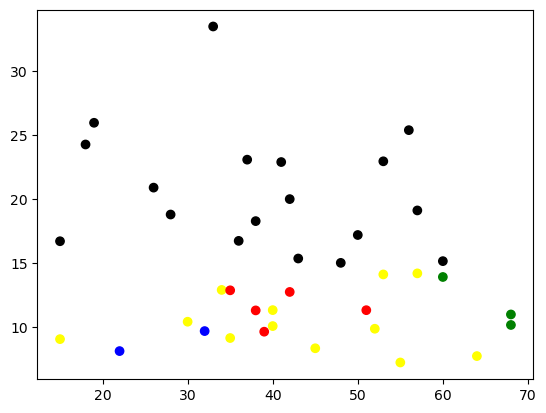

In [72]:
import numpy as np
colourset = np.array(['red','green','blue','yellow','black'])
plt.scatter(xtest[:,0],xtest[:,-1],c=colourset[ypred])

# PCA 

In [73]:
from sklearn.decomposition import  PCA

In [75]:
pca = PCA(n_components=2)

In [76]:
x_new = pca.fit_transform(x)  

In [77]:

xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2, random_state=50)
tree =  DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
ypred = tree.predict(xtest)
accuracy_score(ytest,ypred)

0.65

#out of 5 we used 2 col  # we acheive low accuracy

#now we will use n_component = 3 

In [79]:
pca = PCA(n_components=3)

In [80]:
x_new_ultra = pca.fit_transform(x)  

#here we acheive more accuracy 

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x_new_ultra,y,test_size=0.2, random_state=50)
tree =  DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
ypred = tree.predict(xtest)
accuracy_score(ytest,ypred)   # see 

0.95

## if we get acc similar before/after compression then we will be get particular decision boundry 

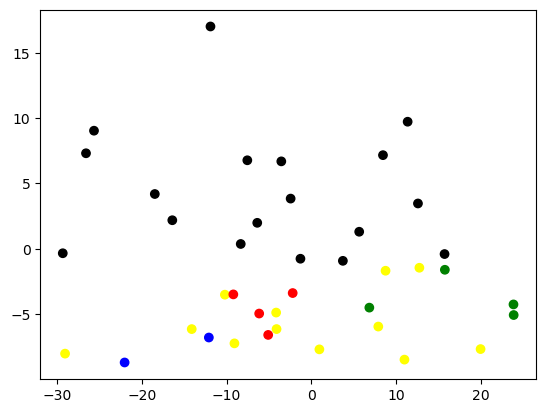

In [85]:
import numpy as np
colourset = np.array(['red','green','blue','yellow','black'])
plt.scatter(xtest[:,0],xtest[:,1],c=colourset[ytest])

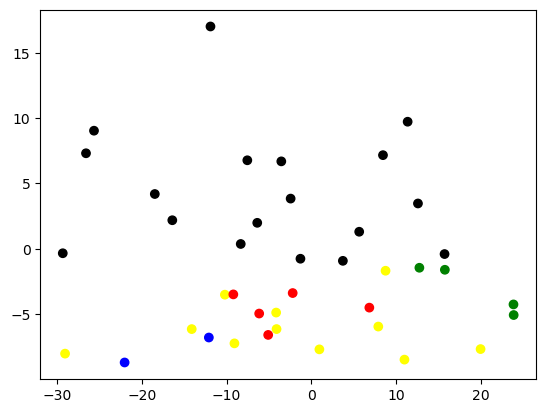

In [86]:

plt.scatter(xtest[:,0],xtest[:,1],c=colourset[ypred])

## we can get 3d plot also for 3 col for plotting 

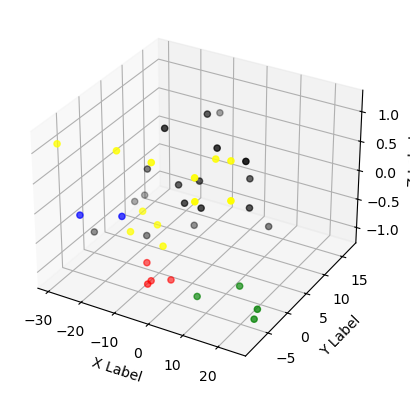

In [87]:
fig = plt.figure() 
ax = fig.add_subplot(projection="3d")  

ax.scatter(xtest[:,0], xtest[:,1], xtest[:,2], c=colourset[ytest]) 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()



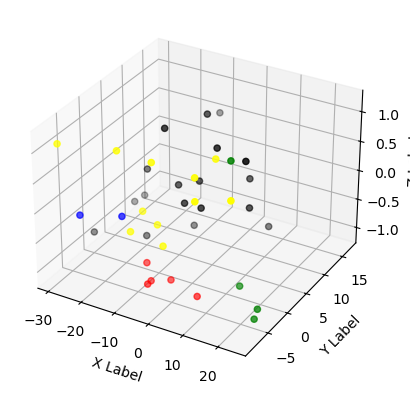

In [89]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(xtest[:,0], xtest[:,1], xtest[:,2], c=colourset[ypred])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()